### Deep Pre-processing and finding frequencies that are relevant for Prediction Modelling

In [ ]:
## SUMMARY OF THIS ANALYSIS

# The reviews have been cleaned to the desired extent. After initial pre-processing, there were  96,31,761 letters.
# A dataframe consisting of words and their freq was created. 
# Then by checking all the words, below given words were removed. 
# ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants','e','ca','nd','wo','el','etc']
# Now in the cleaned review 91,14,481 letters were present 
# all reviews joined into a single paragraph and words were split , then obtained total 13,33,314 words 

'''
In these 37,554 unique words were present

But then found 18606  words appeared only once in our dataset.
30329  words had frequency less than 10 
7225 had  frequency >= 10. 
1860 words had a freqency of >=100
There are 5779 words with frequency >=15 

1860 words had a freqency of >=100 , but this is just 0.05% (1860/37554 =0.0495) and  is very less for analysis

7225 unique words which is about 19% of all unique words (7225/37554 =0.238) are useful for the analysis

We can build our model using these :
    7225 words which have appeared atleast 10 times in our dataset (19.24 %) OR
    
    2913 words which have appeared atleast 50 times in our dataset (7.76 %) OR 
    
    .....
    
    For example, during creating words / terms  , 
    cv=CountVectorizer(max_features, min_df, max_df) -- one or more combo of this
    we can limit using :aa
       max_features = 2000, we can limit terms to 2000
       min_df = 10, words having freq <10, will be removed
       min_df =0.05 ,words appearing in less than 5% of the documents will be removed
       max_df = 1000, words having freq >1000, will be removed
       max_df =0.80 ,words appearing in more than 80% of the documents will be removed

'''

In [ ]:
'''
THESE BELOW VALUES TAKEN FROM LAST 3RD LINE OF THIS CODE FILE

There are 7225 words with frequency >=10 which is 19.24 % of total words
There are 5779 words with frequency >=15 which is 15.39 % of total words
There are 4914 words where frequency is >=20 which is 13.09 % of total words
There are 2913 words where frequency is >=50 which is 7.76 % of total words
There are 1860 words where frequency is >=100 which is 4.95 % of total words
There are 508 words where frequency is >=500 which is 1.35 % of total words
There are 260 words where frequency is >=1000 which is 0.69 % of total words
There are 21 words where frequency is >=5000 which is 0.06 % of total words
There are 5 words where frequency is >=10000 which is 0.01 % of total words
'''

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("E:\\1 P36 PROJECT\\Original Datasets\\train (2).csv")

In [5]:
data.head(3)
data.tail(3)

ID                                             Review  Rating
0   0  exceptional service nice all-around daughter s...       5
1   1  beautiful relaxing jw marriott desert ridge re...       5
2   2  great location great location 5 mins subway ta...       5

ID                                             Review  Rating
14340  14340  great place relax know looking vacation book t...       4
14341  14341  better just got week seattle loved minute, pac...       3
14342  14342  stay clear, internet reservation friday rang h...       1

In [6]:
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords # import stopwords 

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer # to lemmatize the words

from nltk.tokenize import RegexpTokenizer, word_tokenize # to tokenize sentences into words

TEXT NORMALIZATION
converting all letters to lower case
removing numbers
removing punctuations, accent marks and other diacritics
removing white spaces
removing stop words, sparse terms, and particular words

In [7]:
# TEXT NORMALIZATION   or PRE-PROCESSING

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants','e','ca','nd','wo','el','etc']
stop_words = stop_words.union(new_words)

corpus = []
for index, row in data.iterrows():
    text = re.sub('[^a-zA-Z]', ' ', row['Review']) # Remove punctuations    
    text = text.lower() #Convert to lowercase
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)  # remove tags
    text = re.sub("(\\d|\\W)+"," ",text)  # remove special characters and digits
    text = text.split()  # Convert to list from string
    
    #Lemmatisation
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if not word  in stop_words] 
    text_string = " ".join(text)
    data.at[index, 'clean_review'] = text_string
data[0:10]

ID                                             Review  Rating  \
0   0  exceptional service nice all-around daughter s...       5   
1   1  beautiful relaxing jw marriott desert ridge re...       5   
2   2  great location great location 5 mins subway ta...       5   
3   3  pleased nice safe hotel, flower market hotel v...       3   
4   4  excellent hotel service great hotel excellent ...       4   
5   5  beautiful beautiful beautiful, hotel just perf...       5   
6   6  not enought spend night business trip, 5 stars...       3   
7   7  great place, villa ixora good quiet location, ...       5   
8   8  march 14 28th 2007 wonderful relaxing vacation...       4   
9   9  fantastic value true gem stayed hotel husbands...       5   

                                        clean_review  
0  exceptional service nice around daughter staye...  
1  beautiful relaxing jw marriott desert ridge re...  
2  great location great location min subway take ...  
3  pleased nice safe flower market vast array mai...  
4  excellent service great excellent location cou...  
5  beautiful beautiful beautiful perfect thi perf...  
6  enought spend night business trip star buildin...  
7  great place villa ixora good quiet location wa...  
8  march wonderful relaxing vacation stayed catal...  
9  fantastic value true gem stayed husband birthd...

In [20]:
data.to_csv("E:\\1 P36 PROJECT\\clean_review.csv")

In [130]:
data.to_excel("E:\\1 P36 PROJECT\\clean_review1.xlsx")

### Creating new dataframe with length of reviews 

In [8]:
# finding length of the reviews
data1 = data.copy()
data1['text_length_review'] = data1['Review'].apply(len)
data1['text_length_clean_review'] =data1['clean_review'].apply(len)
data1.head()

ID                                             Review  Rating  \
0   0  exceptional service nice all-around daughter s...       5   
1   1  beautiful relaxing jw marriott desert ridge re...       5   
2   2  great location great location 5 mins subway ta...       5   
3   3  pleased nice safe hotel, flower market hotel v...       3   
4   4  excellent hotel service great hotel excellent ...       4   

                                        clean_review  text_length_review  \
0  exceptional service nice around daughter staye...                 937   
1  beautiful relaxing jw marriott desert ridge re...                 791   
2  great location great location min subway take ...                 473   
3  pleased nice safe flower market vast array mai...                 342   
4  excellent service great excellent location cou...                 244   

   text_length_clean_review  
0                       839  
1                       707  
2                       402  
3                       275  
4                       207

In [9]:
sum(data1.text_length_review)  # 10468622 total letters in original reviews
sum(data1.text_length_clean_review)  # 9100139 total letters in cleaned review

data1.text_length_review.max() # max 13501 letters in original review
data1.text_length_review.min() # min 44 letters 

data1.text_length_clean_review.max() # 12175 max letters in cleaned review
data1.text_length_clean_review.min() # min 25 letters

10468622

9100139

13501

44

12175

25

In [10]:
# checking if o/p is number of letters or number of words
a = (' this is a good code')
len(a) # there are 20 letters (and not words)

20

In [11]:
clean_review_list = " ".join(data['clean_review'])
len(clean_review_list) # 91,14,481  total letters   ( before removing ('ca','nd','wo','el','etc') 91,23,517 total letters)
type(clean_review_list)
clean_review_list[0:5]

9114481

str

'excep'

In [115]:
# 9631761 is the number of letters without removing new_words 
# 9293126 is the number of letters after removing ["th","hotel",'room']
# 9252932 is the number of letters after removing ["th","hotel",'room','restaurant']
# 9225994 is the number of letters after removing ['n',"th","hotel",'room','restaurant']
# 9182319 is the number of letters after removing  ['n',"th","hotel",'room','rooms','restaurant']
# 9164913 is the number of letters after removing  ['n',"th","hotel",'hotels','room','rooms','restaurant']
# 9124873 is the number of letters after removing ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants']
# 9123517 is the number of letters after removing ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants','e']
# 9114481 is the number of letters after removing ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants','e','ca','nd','wo','el','etc']

### Calculating the Frequency of Words in the cleaned_review

In [12]:

clean_review_list = " ".join(data['clean_review'])
clean_review_list = clean_review_list.split()
type(clean_review_list)
len(clean_review_list) # 13,33,314 words are present
# 13,36,218 words bfr removing ('ca','nd','wo','el','etc') and  (1352172 words were present when had rooms,hotels,restaurants)
clean_review_list[0:10]


list

1333314

['exceptional',
 'service',
 'nice',
 'around',
 'daughter',
 'stayed',
 'well',
 'priced',
 'night',
 'king']

In [13]:
# Calculating frequency of top 10 frequently occuring words

from collections import Counter

top_N=10
word_dist = nltk.FreqDist(clean_review_list)
freq_data_10 = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
freq_data_10

Word  Frequency
0     great      15197
1      good      12287
2     staff      11700
3      stay      10885
4     night      10326
5       day       9586
6      time       9208
7      nice       8837
8  location       8139
9   service       7697

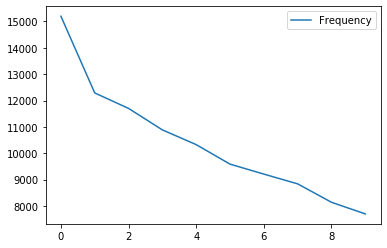

In [14]:
freq_data_10.plot();

In [15]:
# top 10 words
top_N=50

word_dist = nltk.FreqDist(clean_review_list)
freq_data_50 = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
freq_data_50

Word  Frequency
0         great      15197
1          good      12287
2         staff      11700
3          stay      10885
4         night      10326
5           day       9586
6          time       9208
7          nice       8837
8      location       8139
9       service       7697
10        beach       7566
11       stayed       7423
12    breakfast       7063
13         food       6837
14        place       6744
15        clean       6736
16       resort       6516
17         pool       6175
18         like       5793
19       really       5536
20          bed       5504
21         area       4998
22       people       4953
23     friendly       4821
24          bar       4780
25        small       4614
26       little       4495
27          got       4486
28         walk       4485
29    excellent       4344
30         view       4233
31     bathroom       4169
32         best       4081
33       minute       4047
34      helpful       3970
35         trip       3873
36        floor       3772
37        water       3661
38          lot       3636
39        price       3441
40    recommend       3425
41    beautiful       3402
42       review       3401
43         make       3361
44        thing       3336
45         went       3329
46      problem       3245
47  comfortable       3206
48         desk       3152
49        drink       3132

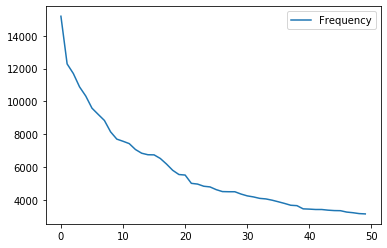

In [16]:
freq_data_50.plot()

In [17]:
# finding frequency of all words 
top_N=1336218
word_dist = nltk.FreqDist(clean_review_list)
freq_data_all = pd.DataFrame(word_dist.most_common(top_N) , columns=['Word', 'Frequency'])

len(freq_data_all) # 37554 words 
freq_data_all[0:5]

freq_data_all.to_excel("E:\\1 P36 PROJECT\\freq_data_all.xlsx")

# we have 37,557 unique words  

37554

Word  Frequency
0  great      15197
1   good      12287
2  staff      11700
3   stay      10885
4  night      10326

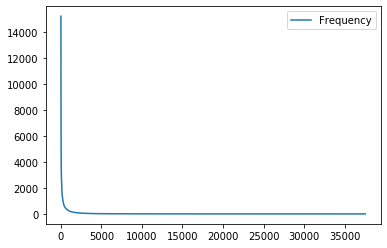

In [18]:
freq_data_all.plot();

### Finding number of words above / below a certain frequency

In [19]:
# least occuring words
freq_data1 = freq_data_all[freq_data_all['Frequency'] >=10]
freq_data1[-10:]

Word  Frequency
7215    unfounded         10
7216       belive         10
7217        filth         10
7218    excercise         10
7219        keith         10
7220    lavoisier         10
7221      belgian         10
7222  restaurents         10
7223   caravaggio         10
7224         kupu         10

In [29]:
freq_data1 = freq_data_all[freq_data_all['Frequency'] >=10]
print('There are',len(freq_data1),'words with frequency >=10 which is',round((7225*100/37554),2),'% of total words') # 7225 words

freq_data2 = freq_data_all[freq_data_all['Frequency'] >=15]
print('There are',len(freq_data2),'words with frequency >=15 which is',round((5779*100/37554),2),'% of total words') # 5779 words

freq_data3 = freq_data_all[freq_data_all['Frequency'] >=20]
print('There are',len(freq_data3),'words where frequency is >=20 which is',round((4914*100/37554),2),'% of total words') # 4914 words

freq_data4 = freq_data_all[freq_data_all['Frequency'] >=50]
print('There are',len(freq_data4),'words where frequency is >=50 which is',round((2913*100/37554),2),'% of total words') # 2913 words 

freq_data5 = freq_data_all[freq_data_all['Frequency'] >=100]
print('There are',len(freq_data5),'words where frequency is >=100 which is',round((1860*100/37554),2),'% of total words') # 1860 words

freq_data6 = freq_data_all[freq_data_all['Frequency'] >=500]
print('There are',len(freq_data6),'words where frequency is >=500 which is',round((508*100/37554),2),'% of total words') # 508 words

freq_data7 = freq_data_all[freq_data_all['Frequency'] >=1000]
print('There are',len(freq_data7),'words where frequency is >=1000 which is',round((260*100/37554),2),'% of total words') # 260 words 

freq_data8 = freq_data_all[freq_data_all['Frequency'] >=5000]
print('There are',len(freq_data8),'words where frequency is >=5000 which is',round((21*100/37554),2),'% of total words') # 21 words

freq_data9 = freq_data_all[freq_data_all['Frequency'] >=10000]
print('There are',len(freq_data9),'words where frequency is >=10000 which is',round((5*100/37554),2),'% of total words')  # 5 words

There are 7225 words with frequency >=10 which is 19.24 % of total words
There are 5779 words with frequency >=15 which is 15.39 % of total words
There are 4914 words where frequency is >=20 which is 13.09 % of total words
There are 2913 words where frequency is >=50 which is 7.76 % of total words
There are 1860 words where frequency is >=100 which is 4.95 % of total words
There are 508 words where frequency is >=500 which is 1.35 % of total words
There are 260 words where frequency is >=1000 which is 0.69 % of total words
There are 21 words where frequency is >=5000 which is 0.06 % of total words
There are 5 words where frequency is >=10000 which is 0.01 % of total words


In [142]:
freq_data10 = freq_data_all[freq_data_all['Frequency'] ==1]
print('There are ',len(freq_data10), 'words with frequency  1')  # 18606  words

freq_data11 = freq_data_all[freq_data_all['Frequency'] <10]
print('There are ',len(freq_data11), 'words with frequency  <10')  # 30329  words


There are  18606 words with frequency  1
There are  30329 words with frequency  <10


In [147]:
print('There are ',len(freq_data_all), 'words in all')  # 37554  words
print()
print('There are ',len(freq_data11), 'words with frequency  <10')  # 30329  words
print()
print('There are ',len(freq_data1), 'words when frequency is >=10')  # 7225 words
print()
print("WE WILL BE USING WORDS HAVING MIN FREQUENCY OF 10 WHICH IS 7225 WORDS")

There are  37554 words in all

There are  30329 words with frequency  <10

There are  7225 words when frequency is >=10

WE WILL BE USING WORDS HAVING MIN FREQUENCY OF 10 WHICH IS 7225 WORDS
